In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [40]:
df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [41]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

- Each Image is of size 28 X 28 
- Total column : 28 X 28 = 784
- One Target Column: i.e. label (0 to 9, indicating each image)
- Total image we have: 4200
- Shape of data: (4200, 785)

In [5]:
import matplotlib.pyplot as plt

In [13]:
# a random data
df.iloc[18406, 1:].values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

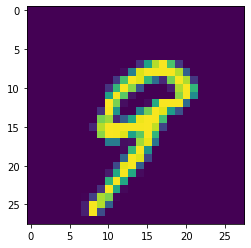

In [14]:
plt.imshow(df.iloc[18406, 1:].values.reshape(28,28))

In [16]:
# label of random data
df["label"][18406]

9

- So each it is clear now, that each image has been broken down into 784 features (each pixels)
- And label is indicating which image it is.

### What we will do now?

- We will first run a **Machine Learning** algorithms over this data and see what kind of accuracy we are getting.

In [42]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [21]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (33600, 784)
Shape of X_test: (8400, 784)


In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier()

In [24]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [25]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(f"Total time take for execution: {(time.time() - start)}")

Total time take for execution: 13.111794710159302


In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)*100

96.48809523809524

### Now Implementing PCA

- And try to reduce the dimension of given data from 784 to some reduced dimension.
- And also see whether we able to get this much accuracy or not.

#### First Step: Mean Centering of Data

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [47]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Next Step: PCA

In [31]:
from sklearn.decomposition import PCA

In [36]:
pca = PCA(n_components=100)

In [48]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [49]:
X_train_trf.shape

(33600, 100)

In [51]:
knn = KNeighborsClassifier()

In [52]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [54]:
y_pred_pca = knn.predict(X_test_trf)

In [56]:
accuracy_score(y_test,y_pred_pca)*100

95.38095238095238

In [60]:
acc_list = []
for i in range(1,785):
    pca = PCA(n_components=i)
    
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    
    knn = KNeighborsClassifier()
    
    knn.fit(X_train_trf,y_train)
    
    y_pred_pca = knn.predict(X_test_trf)
    
    acc = accuracy_score(y_test,y_pred_pca)
    
    acc_list.append(acc)
    
    print(f"Number of Principal Components: {i} and Acuuracy: {acc}")

Number of Principal Components: 1 and Acuuracy: 0.2592857142857143
Number of Principal Components: 2 and Acuuracy: 0.32321428571428573
Number of Principal Components: 3 and Acuuracy: 0.5102380952380953
Number of Principal Components: 4 and Acuuracy: 0.6663095238095238
Number of Principal Components: 5 and Acuuracy: 0.7378571428571429
Number of Principal Components: 6 and Acuuracy: 0.8226190476190476
Number of Principal Components: 7 and Acuuracy: 0.8430952380952381
Number of Principal Components: 8 and Acuuracy: 0.8720238095238095
Number of Principal Components: 9 and Acuuracy: 0.8869047619047619
Number of Principal Components: 10 and Acuuracy: 0.9052380952380953
Number of Principal Components: 11 and Acuuracy: 0.9105952380952381
Number of Principal Components: 12 and Acuuracy: 0.9189285714285714
Number of Principal Components: 13 and Acuuracy: 0.9284523809523809
Number of Principal Components: 14 and Acuuracy: 0.9360714285714286
Number of Principal Components: 15 and Acuuracy: 0.93880

KeyboardInterrupt: 

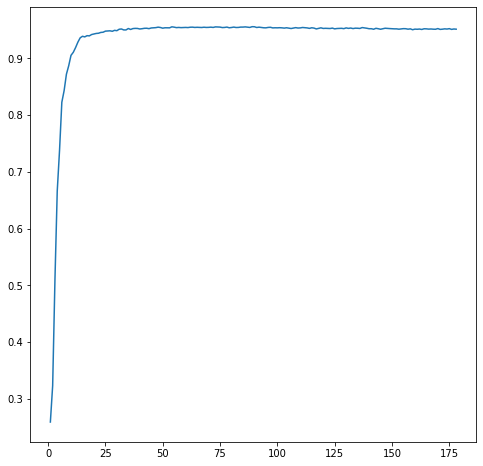

In [64]:
plt.figure(figsize=(8,8))
plt.plot(range(1,179),acc_list)
plt.show()

- From graph and above code, it is clear that after certain number of principal componenets, accuarcy do not increase because as we go further later PCs don't able to explain much variance and that's why graph become flat.

### Visualization of data in 2D and 3D

In [65]:
# transforming to a 2D coordinate system
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [66]:
X_train_trf

array([[-2.71861847, -0.49031124],
       [-0.67698525, -6.75275471],
       [-3.03324518,  6.50998853],
       ...,
       [ 2.14884108,  0.78157867],
       [ 1.05959299,  0.94682537],
       [17.70260098,  1.96168516]])

In [67]:
import plotly.express as px

In [69]:
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10)

fig.show()

In [70]:
# transforming in 3D
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [71]:
X_train_trf

array([[-2.71865749, -0.48980397,  1.13564368],
       [-0.67699127, -6.75374081, -2.3361853 ],
       [-3.03323989,  6.50982428,  7.49228085],
       ...,
       [ 2.148871  ,  0.78037823, -0.74896217],
       [ 1.05954346,  0.94771759,  3.94993906],
       [17.70261871,  1.96200221, -4.94366481]])

In [74]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 z=X_train_trf[:,2],
                 color=y_train_trf)
fig.update_layout(
         margin=dict(l=20, r=20, t=20, b=20)
)

fig.show()

### Few important attributes of PCA

In [75]:
# Explained Variance is nothing but eigen value of top 3 eigen vectors (PCs) (Eigen value with larger value)
pca.explained_variance_

array([40.67111197, 29.17023399, 26.74459572])

In [76]:
# Principal Components: Eigen Vectors
pca.components_

# Set of three vectors in 784 dimensions

array([[ 6.91003961e-18,  2.06478378e-18,  3.04213416e-20, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.62477409e-17,  1.14465670e-17,  5.00154922e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.07088037e-16, -1.87928045e-17, -6.90590185e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

## How to find optimum number of Principal Components?

- Eigen value tells us that how much variance of original data one individual principal componet (eigen vector) is able to explain.
- When we use attribute explained_variance, then the values which we get are not in percent.
- But we need to convert them into percent.
- To find the percentage, we can divide individual eigen value with the sum of all eigen value and multiplying it with 100.
- Or simply we can make use attribute explained_variance_ratio_
- And alteast 90% of varinace we need to explain.
- So we will take that much component, which variance explained percentage sum is equal to 90% or more.

In [79]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [80]:
100*pca.explained_variance_ratio_

array([5.78519225, 4.14926968, 3.80423894])

- Here we can see that first eigen vector is explaining 5.7% of variance of original data.
- Second one is explaining 4.14%
- And thrid one is explaining 3.8%
- So if we add all these 3, so we get something 12%.
- So we can say that top 3 eigen vectors are able to explain 12% of variance of original data.

In [81]:
# Now lets find optimum numer of components
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [84]:
pca.explained_variance_.shape

# Total 784 eigen value

(784,)

In [86]:
pca.components_.shape

# Total 784 eigen vector (PCs) in 784 dimensional space

(784, 784)

In [89]:
# cumulative sum
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

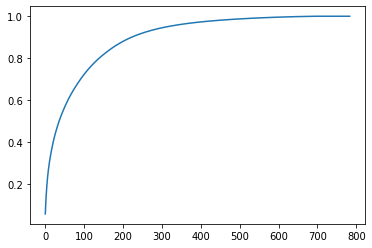

In [91]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

### Thumb Rule
- Try to explain atleast 90% of variance of original data

### When PCA does not work?

- There are few data, which don't let PCA work.
- Some time it may possible that our data in higher dimensional space aligned in such a way that variance across all the axes will be same. It doesn't matter how you rotate the axes.
- Circular Data, Variance on both the axes are same.
- When there will be too much overlapping between different points and we don't able to differentiate between two points.
- If there is a specific pattern in data, y = X^2 then when we bring this type of data to lower dimension then we will loose that pattern.
- Weak relationship between features.